# Handling Texts

This notebook shows how you can handle texts you already have.

## Opening text files

In [ ]:
ls

In [1]:
# Importing a text file
with open("Hume Treatise.txt", "r") as f:
    Text1 = f.read()
    
print("This string has", len(Text1), "characters.")

This string has 1344061 characters.


In [2]:
print("This string has", "{:,}".format(len(Text1)), "characters") # This uses a mini format language

This string has 1,344,061 characters


## Simple handling

### Extracting the Text
Now we want to get just the text out and remove the Gutenberg stuff.

In [3]:
startText = "*** START OF THIS PROJECT GUTENBERG EBOOK"
endText = "End of Project Gutenberg's A Treatise of Human Nature, by David Hume"

start = Text1.find(startText)
end = Text1.find(endText)
HumeString1 = Text1[start:end].strip()
print(HumeString1[:100:],"\n+++++++++++++++++++++\n",HumeString1[-100:])

*** START OF THIS PROJECT GUTENBERG EBOOK A TREATISE OF HUMAN NATURE ***




Produced by Col Choat

 
+++++++++++++++++++++
 e
same object can only be different by their different feeling, I should
have been nearer the truth.


### Finding things

Now we will use the built in tools to find things and show context.

In [4]:
## This will count the instances of the word we want.
## Note how I handle the possibility of a capitalized version of the word
print(HumeString1.count("Truth"))
print(HumeString1.count("truth"))
print((HumeString1.count("truth") + HumeString1.count("Truth")))

2
70
72


In [50]:
word2find = input("What word to find?")
context = 30
start = 0
while start != -1:
    start = HumeString1.find(word2find,start+1)
    print(HumeString1[(start-context):(start+context)].strip("\n"), "\n")
print("------------------------------------------------------")
word2find2 = word2find.capitalize()
print(word2find2)
start = 0
while start != -1:
    start = HumeString1.find(word2find2,start+1)
    print(HumeString1[(start-context):(start+context)].strip("\n"), "\n")

What word to find?thened
e same difficulties, it is burthened with some additional
on 

le contempt is likewise
strengthened by the two relations of 

 

------------------------------------------------------
Thened
 



In [51]:
import re
word2check = input("What root to look for?")
pattern2check = "\w*" + word2check + "\w*" 
# \w matches a word character, \w* means match zero, one or more word characters
# By deleting the "\w*" on either side you 
theMatches = re.compile(pattern2check, re.IGNORECASE).findall(HumeString1)
print("Number of matches ", len(theMatches))
print("Variant forms: ", set(theMatches)) # set removes duplicates

What root to look for?the
Number of matches  21682
Variant forms:  {'mathematician', 'burthened', 'strengthen', 'THERE', 'theory', 'Father', 'Mathematical', 'hypothesis', 'Otherwise', 'FARTHER', 'Theologians', 'otherwise', 'Either', 'others', 'strengthening', 'further', 'either', 'sympathetic', 'theirs', 'mathematics', 'farthest', 'breathe', 'anther', 'Others', 'then', 'mathematical', 'Neither', 'ether', 'hypotheses', 'there', 'strengthens', 'ANOTHER', 'farther', 'neither', 'authentic', 'father', 'atheist', 'Athenians', 'smoother', 'They', 'forefathers', 'other', 'Then', 'brothers', 'nevertheless', 'Other', 'Mathematics', 'Another', 'There', 'another', 'theft', 'their', 'hitherto', 'together', 'thereby', 'THEM', 'OTHERS', 'Whether', 'The', 'brother', 'thence', 'Themistocles', 'the', 'whether', 'them', 'THE', 'therefore', 'THESE', 'theologians', 'these', 'atheists', 'theatre', 'tothe', 'weather', 'mathematicians', 'atheism', 'These', 'THEY', 'themselves', 'hypothetical', 'THEREFORE', 'T

## Simple exploration using NLTK
Now we will show how to use NLTK to do more.

First we have to import the NLTK library.

In [6]:
import nltk

Now we have to tokenize the text. We also lowercase it and eliminate non alphabetic tokens.

In [7]:
Hume1TokensLower = nltk.word_tokenize(HumeString1.lower()) # This lowercases all words and then tokenizes 
Hume1TokensLower2 = [word for word in Hume1TokensLower if word[0].isalpha()] # This eliminates non words
print(Hume1TokensLower2[:10])

['start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'a', 'treatise', 'of', 'human']


Now we get a distribution of words.

In [8]:
Hume1TokensLower2Dist = nltk.FreqDist(Hume1TokensLower2)
Hume1TokensLower2Dist.tabulate(10)

  the    of   and    to    is     a  that    in    it    we 
13675 10241  8637  6804  4786  4623  4524  4335  3552  2856 


We can plot the distribution of the top 25 words

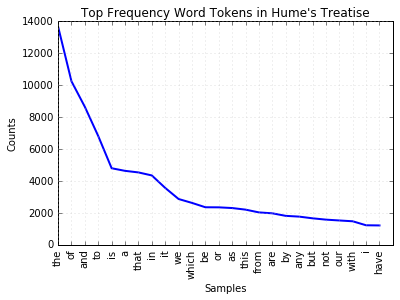

In [9]:
import matplotlib
%matplotlib inline
Hume1TokensLower2Dist.plot(25, title="Top Frequency Word Tokens in Hume's Treatise")

Now we get a concordance the NLTK way.

In [48]:
word2concord = input("What word to concord?")
Hume1Text = nltk.Text(Hume1TokensLower2)
Hume1Text.concordance(word2concord, lines=10)

What word to concord?give
Displaying 10 of 267 matches:
he most momentous we are not able to give any certain decision disputes are mu
 so the only solid foundation we can give to this science itself must be laid 
r ignorance and perceive that we can give no reason for our most general and m
ever appear in the contrary order to give a child an idea of scarlet or orange
 by any accident the faculties which give rise to any impressions are obstruct
me ideas which perhaps in their turn give rise to other impressions and ideas 
ure and principles of the human mind give a particular account of ideas before
mpossible it is sufficient if we can give any satisfactory account of them fro
f this mutual complaisance i can not give a more evident instance than in the 
ly defect of our senses is that they give us disproportioned images of things 


In [22]:
Hume1Text.similar(word2concord)

it relation pride pleasure matter objects idea passion belief love
nature causes property reasoning power resemblance reason society
ideas mind


In [45]:
Hume1Text.collocations(num=20, window_size=2)

human nature; continued existence; every thing; give rise; may
observe; properly speaking; constant conjunction; difference betwixt;
general rules; present impression; take place; external objects; every
one; right line; shall find; first sight; double relation; like
manner; great measure; infinite divisibility


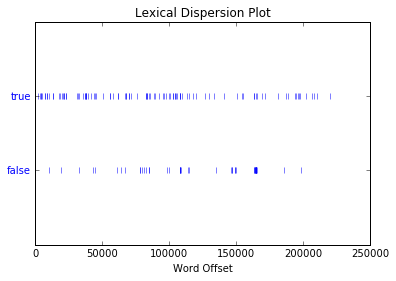

In [23]:
Hume1Text.dispersion_plot(["true","false"])

## Getting high frequency content words

In [39]:
stopwords = nltk.corpus.stopwords.words("english")
wordsToAppend = ["may","one","us","must","upon","every","without","though","therefore","first","two","would"]
stopwords2 = stopwords + wordsToAppend
print(stopwords2)
# I need to find a way to append a bunch of words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [40]:
Hume1ContentWords = [word for word in Hume1TokensLower2 if word not in stopwords2]
Hume1ContentWordsDist = nltk.FreqDist(Hume1ContentWords)
Hume1ContentWordsDist.tabulate(10)

    idea   object  objects    ideas     mind relation  present passions   reason   nature 
     822      692      664      633      599      464      449      432      431      415 


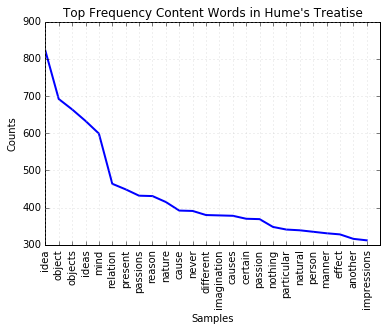

In [41]:
Hume1ContentWordsDist.plot(25, title="Top Frequency Content Words in Hume's Treatise")

## Combining fequency lists